In [1]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import pandas as pd 
import json

In [2]:
tweets_file = open("accor_data.txt", "r")

In [3]:
tweets_data = []
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [4]:
tweets_file = open("output.txt", "r")

In [5]:
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [6]:
len(tweets_data)

8808

In [7]:
temp = list(filter(lambda x: 'limit' not in x.keys(),tweets_data))

In [8]:
len(temp)

8808

In [9]:
tweets = pd.DataFrame()
tweets['text'] = list(map(lambda tweet: tweet['text'], temp))

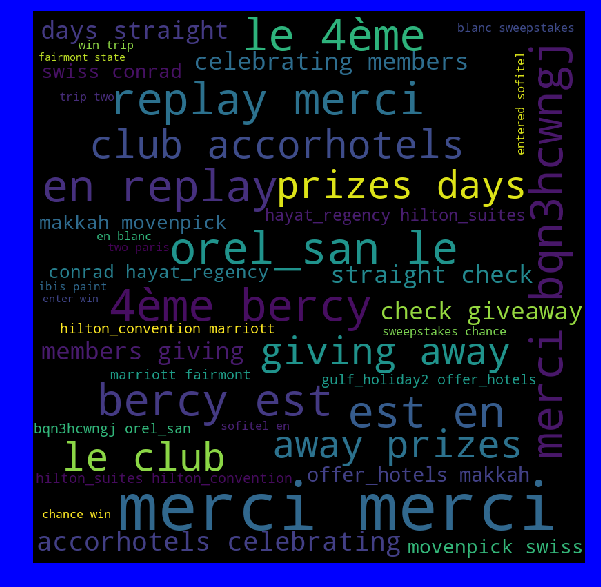

In [10]:
comment_words = ' '
stopwords = set(STOPWORDS) 
stopwords.update(['co', 'https', 'rt'])

#iterate through the CONTENT column
for val in tweets.iloc[:10000]['text']: 
    for words in str(val).split(): 
        comment_words = comment_words + words.lower() + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, background_color ='black', stopwords = stopwords, min_font_size = 15).generate(comment_words) 
  
# plot wordcloud image                      
plt.figure(figsize = (8, 8), facecolor = 'blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [11]:
comment_words

' boys: fairmont senior polar bears 77, wyoming east warriors 58 (fairmont senior tournament). more final scores: https://t.co/h8ymyfupjr 3月〜！！ 受験受かってはぴはぴになりながら従姉妹の家で遊んだのが1番楽しかった… ibis paintと少しずつ和解しだしたのもここ。 rt @sundevilwbb: hey @nkealharry15, we’re big kianna ibis fans too 😏 https://t.co/nyunuykgoc rt @dprez304: division 1 schools are sleeping on 2019 fairmont senior (wv) pg zyon dobbs. winner, leader, makes his teammates better. plays… 愛媛のibisっていう上級大尉にレクスで覚醒使わず2落ちという捨てゲーされた😭 karthik kickstarts the pre tour briefing at the amazing ibis hotel today in bangalore. 110 riders are all set to ge… https://t.co/wlppruy4kb i just entered the sofitel en blanc sweepstakes for a chance to win a trip for two to paris and more. you should to… https://t.co/swjn6sgcbv roadblock at the pool hall fairmont rt @nrsports_nc: trc finals. boys: whiteville 52 east columbus 48, west columbus 66 fairmont 57, south columbus 68 east bladen 52, red spri… i just entered the sofitel en blanc sweepstakes for a chance

In [12]:
retweets = {}
for retweet in temp:
    if 'retweeted_status' not in retweet:
        continue
    rt = retweet['retweeted_status']
    if rt['retweet_count'] < 1000:
        continue
    retweets[rt['id_str']] = rt
    # convert to list
retweets = [retweets[w] for w in retweets.keys()]
    # sort by retweet count
retweets.sort(key=lambda x: -x['retweet_count'])

In [13]:
for t in retweets[:10]:
    print ('['+ t['user']['screen_name'] + ']: ' + t['text'] + \
    ' [' + str(t['retweet_count']) + ' retweets]'+'\n')

[maichrd]: OP Neyshen after SPS / Sofitel Date HAHAHAHA

#ALDUBNewbornBabies https://t.co/Mpjo5jYIds [3115 retweets]

[ctapyxx]: มายืนยัน นอนยันค่ะว่าแอพ ibis paint ดีจริงงง เป็นแอพวาดรูปในโทรศัพท์ที่ใช้มานานที่สุดเลย มีแปรงเยอะมาก ไม่ต้องเสียเ… https://t.co/U5E4sj3G46 [2614 retweets]

[zalizap]: เมื่อกูโหลด ibis ตามคนในทวิตมาลองเล่นๆ...  เล่นๆไรมึ้งงงงงงงงงงงงงงงงงงงงงงงงงงงงงงงงงงงงงงงงงงงงงงงงงงงง… https://t.co/RifWKlaM3b [2333 retweets]

[raye_mura]: そんなわけでご無沙汰してます。『Ibis Pink』トキさんのお話その１です。前回よりちょいと長めです。 https://t.co/MBrYvd7KG0 [1431 retweets]



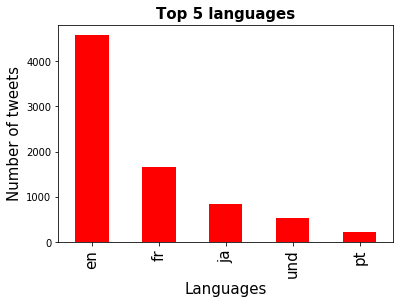

In [12]:
tweets['lang'] = list(map(lambda tweet: tweet['lang'], temp))
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

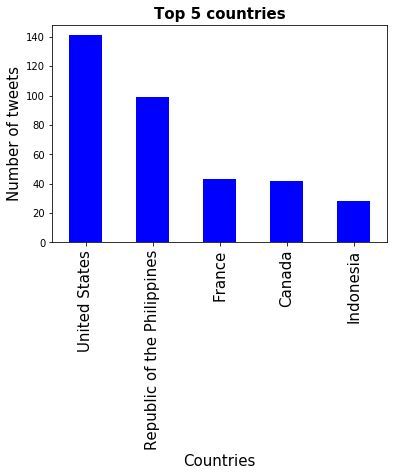

In [15]:
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, temp))
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

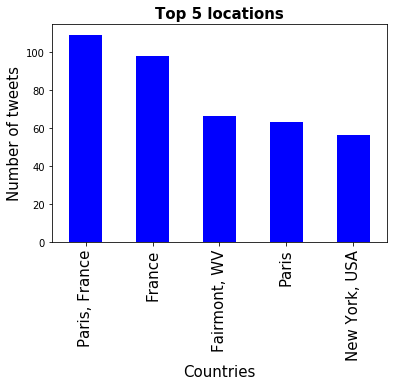

In [17]:
tweets['location'] = list(map(lambda tweet: tweet['user']['location'], temp))
tweets_by_loc = tweets['location'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 locations', fontsize=15, fontweight='bold')
tweets_by_loc[:5].plot(ax=ax, kind='bar', color='blue')

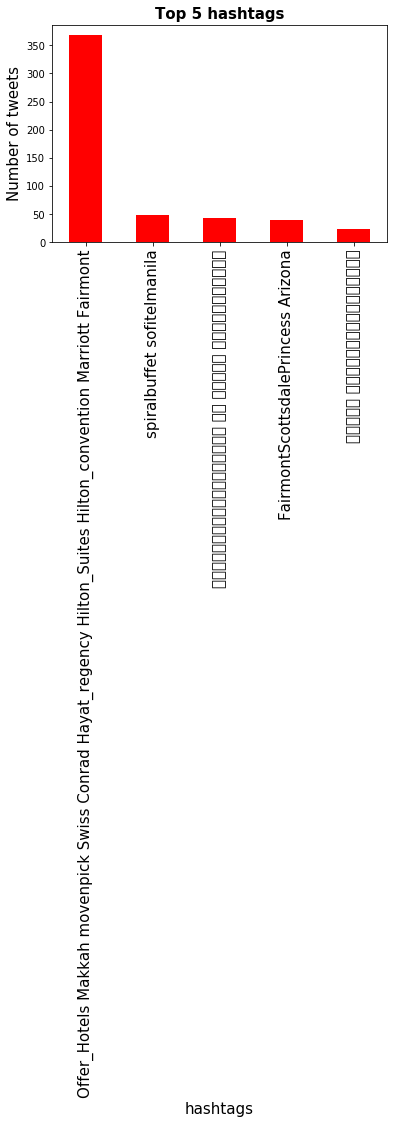

In [18]:
tweets['hashtags'] = list(map(lambda tweet: ' '.join([i['text'] for i in tweet['entities']['hashtags']]), temp))
tweets_by_lang = tweets['hashtags'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('hashtags', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 hashtags', fontsize=15, fontweight='bold')
tweets_by_lang[1:6].plot(ax=ax, kind='bar', color='red')

In [20]:
tweets_by_lang[:10]

                                                                                                              6732
Offer_Hotels Makkah movenpick Swiss Conrad Hayat_regency Hilton_Suites Hilton_convention Marriott Fairmont     368
spiralbuffet sofitelmanila                                                                                      49
一年で絵が上達してるか見てみましょう 糸会 オリジナル 絵描きさんと繋がりたい                                                                         43
FairmontScottsdalePrincess Arizona                                                                              40
ぽこあーと オシャレになりたいピーナッツくん                                                                                          23
Vijayawada                                                                                                      20
ReformAndOpeningUp                                                                                              20
wvprepbb                                                                        

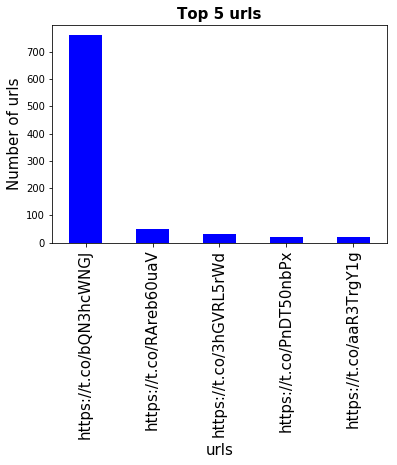

In [21]:
tweets['urls'] = list(map(lambda tweet: ' '.join([i['url'] for i in tweet['entities']['urls']]), temp))
tweets_by_lang = tweets['urls'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('urls', fontsize=15)
ax.set_ylabel('Number of urls' , fontsize=15)
ax.set_title('Top 5 urls', fontsize=15, fontweight='bold')
tweets_by_lang[1:6].plot(ax=ax, kind='bar', color='blue')

In [22]:
tweets_by_lang[:10]

                           3804
https://t.co/bQN3hcWNGJ     760
https://t.co/RAreb60uaV      49
https://t.co/3hGVRL5rWd      32
https://t.co/PnDT50nbPx      20
https://t.co/aaR3TrgY1g      19
https://t.co/TkJMiuhM7J      18
https://t.co/HUA0BHnQBq      17
https://t.co/AwinWxaTZT      14
https://t.co/12gtbcDIOF      12
Name: urls, dtype: int64

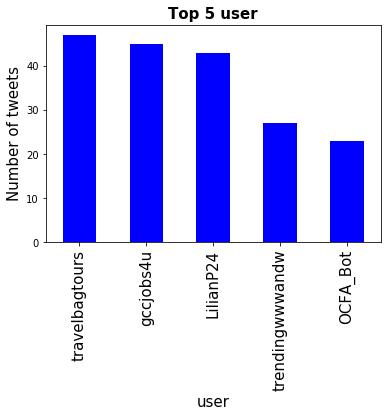

In [23]:
tweets['user'] = list(map(lambda tweet: tweet['user']['screen_name'], temp))
tweets_by_loc = tweets['user'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('user', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 user', fontsize=15, fontweight='bold')
tweets_by_loc[:5].plot(ax=ax, kind='bar', color='blue')

In [25]:
tweets_by_loc[:10]

travelbagtours     47
gccjobs4u          45
LilianP24          43
trendingwwwandw    27
OCFA_Bot           23
ashabakah_com      19
gunz11895894       16
magnifyk           16
TheMountainEast    15
SugeChaos_ACbot    13
Name: user, dtype: int64